core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '4', '10', '44', '18', '31', '27', '14', '81', '11', '63', '24', '21', '22', '77', '20', '23', '16', '2']
C:\Users\roblo\anaconda3\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and

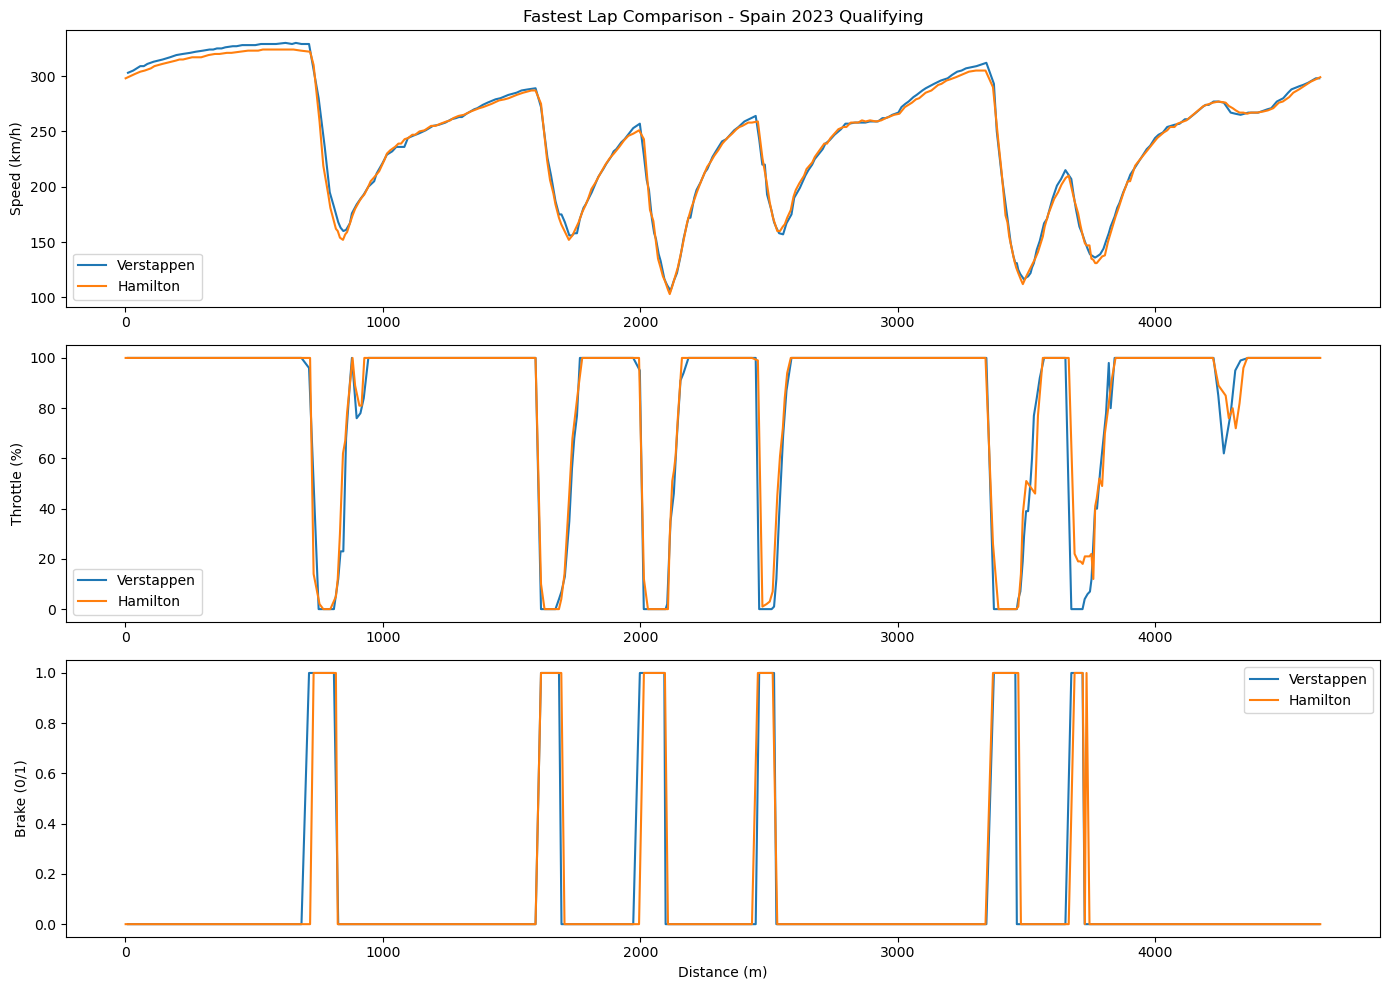

In [1]:
import fastf1
from fastf1 import plotting
import matplotlib.pyplot as plt

# Enable caching
fastf1.Cache.enable_cache('cache')  

# Load a session (2023 Spanish GP qualifying)
session = fastf1.get_session(2023, 'Spain', 'Q')
session.load()

# Pick the two drivers (Hamilton, Verstappen)
ver = session.laps.pick_driver('VER').pick_fastest()
ham = session.laps.pick_driver('HAM').pick_fastest()

# Get telemetry
ver_tel = ver.get_car_data().add_distance()
ham_tel = ham.get_car_data().add_distance()

# Create figure with 3 stacked subplots
plt.figure(figsize=(14,10))

# --- Speed Comparison ---
plt.subplot(3,1,1)
plt.plot(ver_tel['Distance'], ver_tel['Speed'], label='Verstappen')
plt.plot(ham_tel['Distance'], ham_tel['Speed'], label='Hamilton')
plt.ylabel('Speed (km/h)')
plt.title('Fastest Lap Comparison - Spain 2023 Qualifying')
plt.legend()

# --- Throttle Comparison ---
plt.subplot(3,1,2)
plt.plot(ver_tel['Distance'], ver_tel['Throttle'], label='Verstappen')
plt.plot(ham_tel['Distance'], ham_tel['Throttle'], label='Hamilton')
plt.ylabel('Throttle (%)')
plt.legend()

# --- Brake Comparison ---
plt.subplot(3,1,3)
plt.plot(ver_tel['Distance'], ver_tel['Brake'], label='Verstappen')
plt.plot(ham_tel['Distance'], ham_tel['Brake'], label='Hamilton')
plt.xlabel('Distance (m)')
plt.ylabel('Brake (0/1)')
plt.legend()

# Adjust layout & show plot
plt.tight_layout()
plt.show()
